In [3]:
from toolbox.data import read_data, read_geojson, read_coastline, process_roommates
from toolbox.fit import CONFIG
from toolbox.model_pipeline import preprocess_data
import matplotlib.pyplot as plt

In [4]:
data = read_data()

C:\Radboud\2223\DataMiningProject\data-mining-project\venv\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
import pandas as pd
import numpy as np


# index = (data['rent'] < 1000) & (data['areaSqm'] < 30) #44646
# index = index & (data['areaSqm'] < 30) #34735

# data = data[index] # limit areaSq by 30 or 50


print(data.shape)

data = preprocess_data(CONFIG)
# data = data[index]


(46722, 63)


C:\Radboud\2223\DataMiningProject\data-mining-project\venv\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


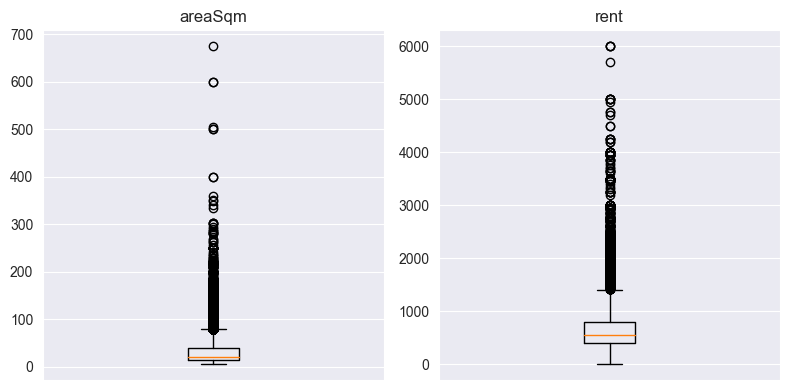

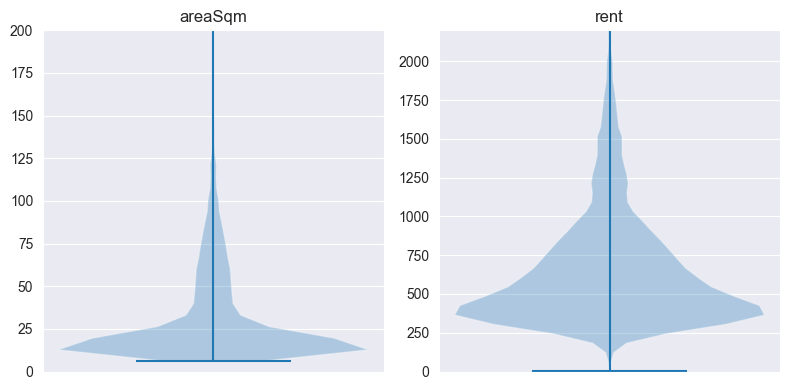

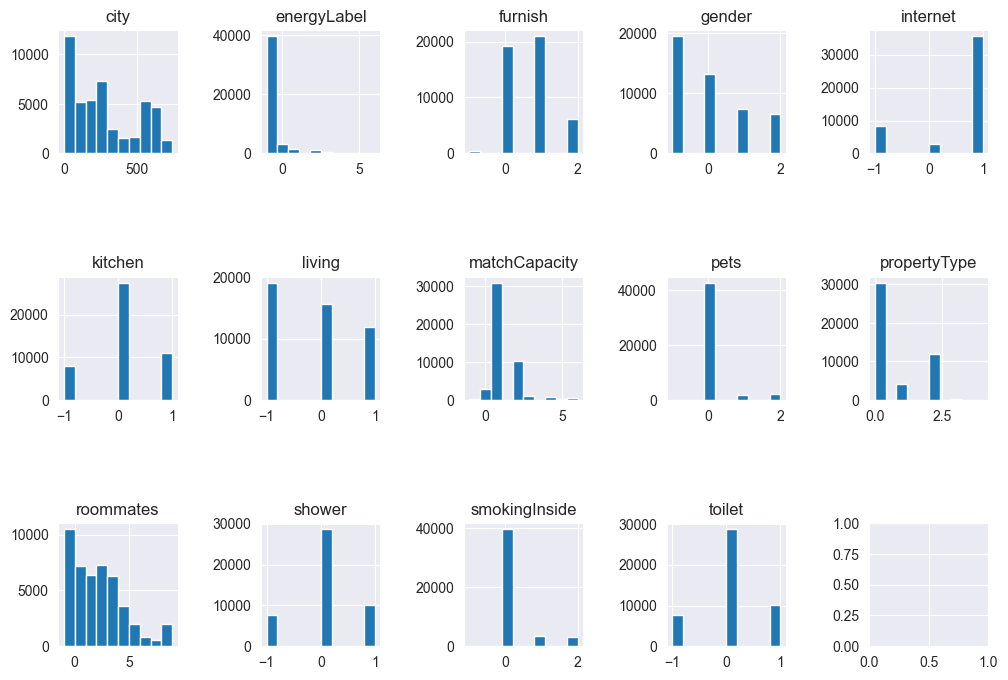

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # nicer graphics
sns.set_style('darkgrid')
boxplot_attributes = [  'areaSqm',
                'rent']

attributes = [# 'additionalCosts',
                'city',
                # 'deposit',
                'energyLabel',
                'furnish',
                'gender',
                'internet',
                'kitchen',
                'living',
                'matchCapacity',
                # 'matchStatus',
                'pets',
                'propertyType',
                'roommates',
                'shower',
                'smokingInside',
                'toilet']



boxplot_data = data[boxplot_attributes].values
d = data[attributes].values
# print(d)
boxplot_x = 1
boxplot_y = len(boxplot_attributes)

x = 3
y = 5
h_space = 1
w_space = 0.7

# plt.figure()
fig, axes = plt.subplots(boxplot_x, boxplot_y, figsize=(8,4))
fig.subplots_adjust(hspace=h_space, wspace=w_space)
for n in range(boxplot_x * boxplot_y):

    axes[n].boxplot(boxplot_data[:, n])
    axes[n].set(title=boxplot_attributes[n])
plt.savefig("plots/feature_boxplots.pdf")
# Set the ticks and ticklabels for all axes
plt.setp(axes, xticks=[])
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(boxplot_x, boxplot_y, figsize=(8,4))
fig.subplots_adjust(hspace=h_space, wspace=w_space)
for n in range(boxplot_x * boxplot_y):
    axes[n].violinplot(boxplot_data[:, n])
    axes[n].set(title=boxplot_attributes[n])
    print()
    if boxplot_attributes[n] == 'areaSqm':
        axes[n].set_ylim([0, 200])
    if boxplot_attributes[n] == 'rent':
        axes[n].set_ylim([0, 2200])
plt.savefig("plots/feature_violinplots.pdf")
plt.setp(axes, xticks=[])
fig.tight_layout()
plt.show()

# plt.figure()
fig, axes = plt.subplots(x, y, figsize=(12,8))
fig.subplots_adjust(hspace=h_space, wspace=w_space)
for n in range(x * y):
    if(n == len(attributes)):
        break
    axes[n // y, n % y].hist(d[:, n])
    axes[n // y, n % y].set(title=attributes[n])

plt.savefig("plots/feature_histograms.pdf")
plt.show()








In [ ]:
amsterdam = read_geojson()
amsterdam.plot(column='Opp_m2', cmap='plasma')
plt.show()

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

data = gpd.GeoDataFrame(data, crs={ 'init': 'epsg:4326' }, geometry=[Point(coord) for coord in zip(data['longitude'], data['latitude'])])

In [ ]:
coastline = read_coastline()
coastline.to_crs(epsg=3857).plot(color='lightgrey', edgecolor='grey')
plt.show()

In [ ]:
for i, row in coastline.to_crs(epsg=3857).iterrows():
    geometry = row['geometry']

    data_within_region = data[data.to_crs(epsg=3857).within(geometry)]

    coastline.loc[i, 'advertisements'] = len(data_within_region)
    coastline.loc[i, 'mean_rent'] = data_within_region['rent'].mean()
    coastline.loc[i, 'median_rent'] = data_within_region['rent'].median()
    coastline.loc[i, 'mean_rent_per_sqm'] = (data_within_region['rent'] / data_within_region['areaSqm']).mean()
coastline = coastline.fillna(0)

In [ ]:
def plot_map(dataframe, column, title=None, cmap=None, figsize=(9, 7), colorbar_axes=None):
    if cmap is None:
        cmap = 'plasma'
    if colorbar_axes is None:
        colorbar_axes = [.81, .15, .04, .7]

    f, ax = plt.subplots()
    plot = dataframe.to_crs(epsg=3857).plot(ax=ax, column=column, edgecolor='grey', cmap=cmap)
    if title is not None:
        ax.set_title(title)

    cax = f.add_axes([.81, .15, .04, .7])
    scalar_mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=coastline['advertisements'].min(),
                                                                          vmax=coastline['advertisements'].max()))
    f.colorbar(scalar_mappable, cax=cax)

plot_map(coastline, 'advertisements', title='Number of advertisements')
plot_map(coastline, 'mean_rent_per_sqm', title=r'Mean rent per $\mathrm{m}^2$')